<a href="https://colab.research.google.com/github/basithbahi/PCVK/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Nama:   Abdul Basith Bahi
    NIM:    2141720177
    Kelas:  3H

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

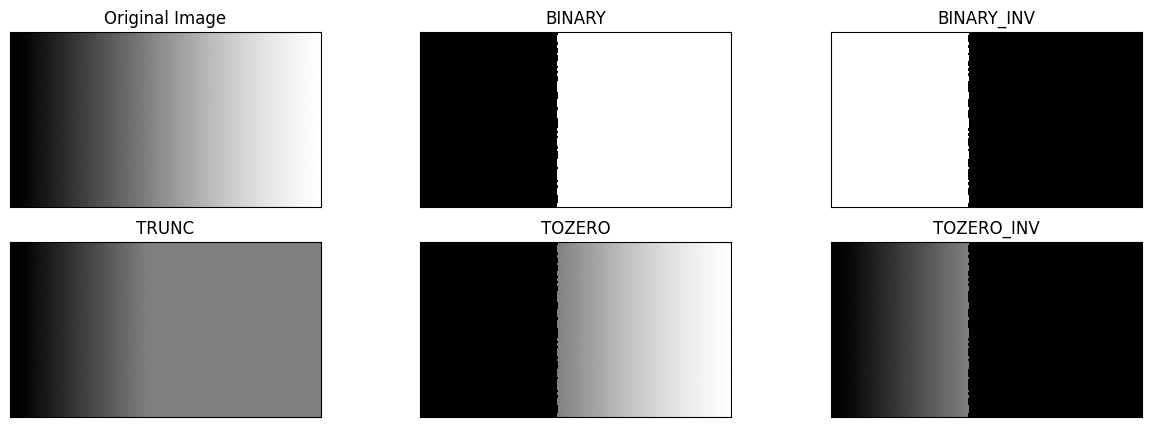

In [3]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

**Adaptive Threshold**

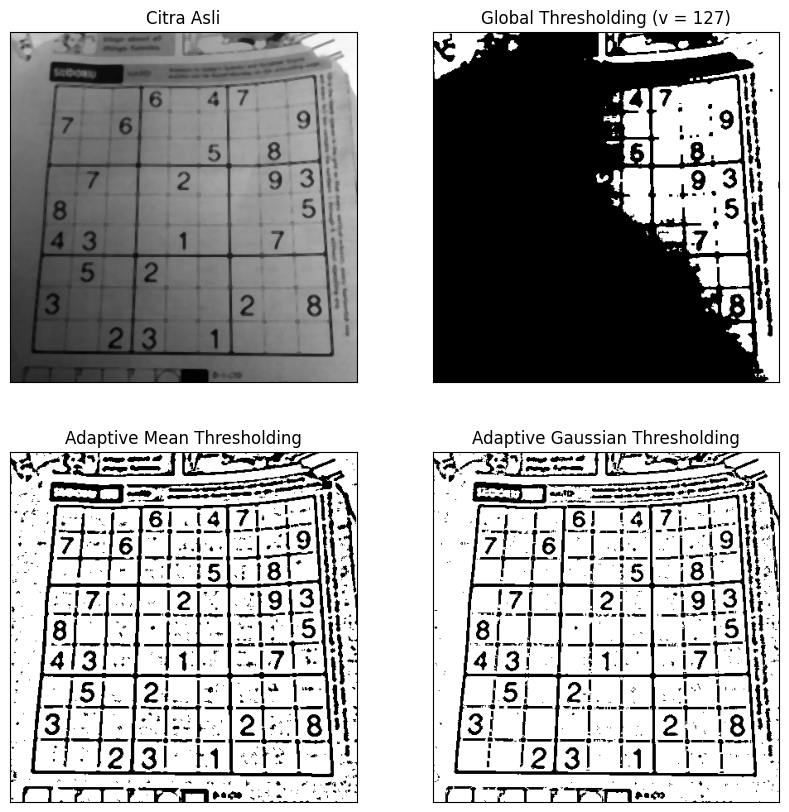

In [4]:
filename = ('/content/drive/MyDrive/PCVK/Images/sudoku-original.jpg')

citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)

#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))

for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])

plt.show()

**Otsu’s Threshold dengan library OpenCV**


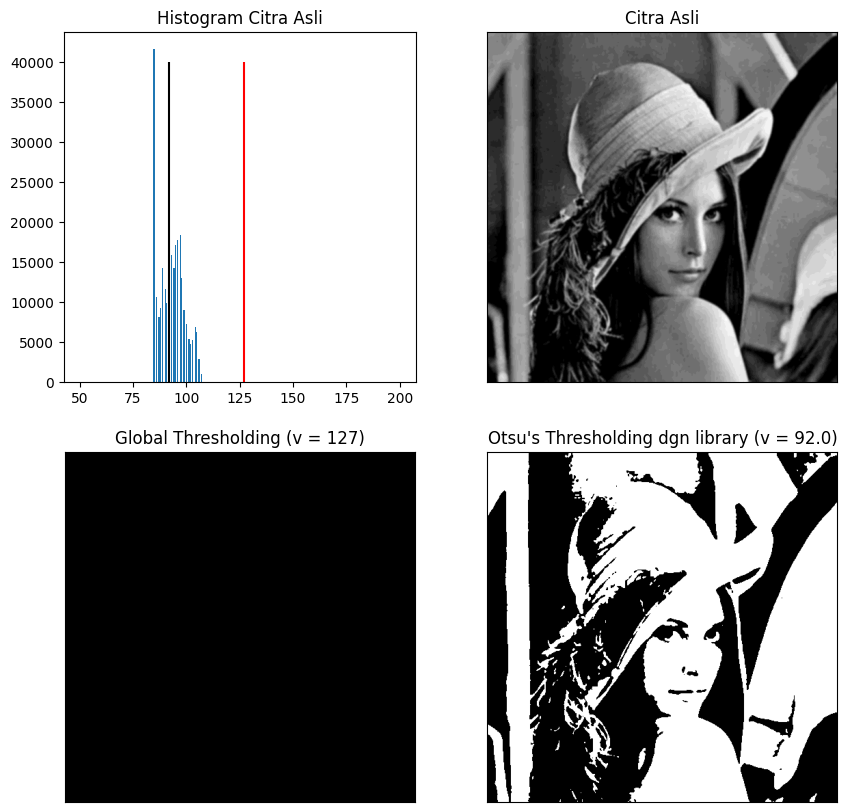

In [5]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/lena_gs_lc2.jpg')

img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]

citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])

plt.show()

**Threshold Otsu’s tanpa Gaussian Filter dan dengan menggunakan Gaussian Filter.**

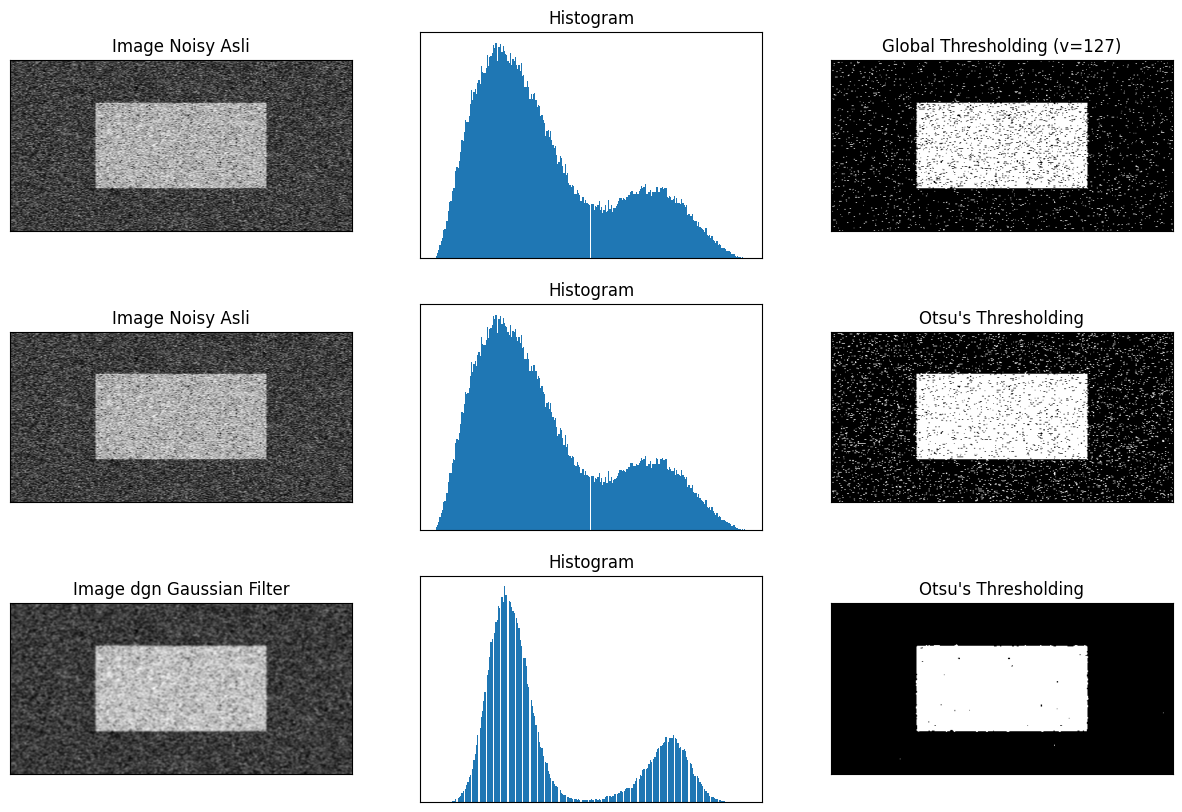

In [6]:
filename = ('/content/drive/MyDrive/PCVK/Images/noisy2.png')

img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
          'Image Noisy Asli','Histogram',"Otsu's Thresholding",
          'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))

for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

**Sementasi Citra menggunakan K-Means**

(<Axes: >, <matplotlib.image.AxesImage at 0x7d3566bad150>)

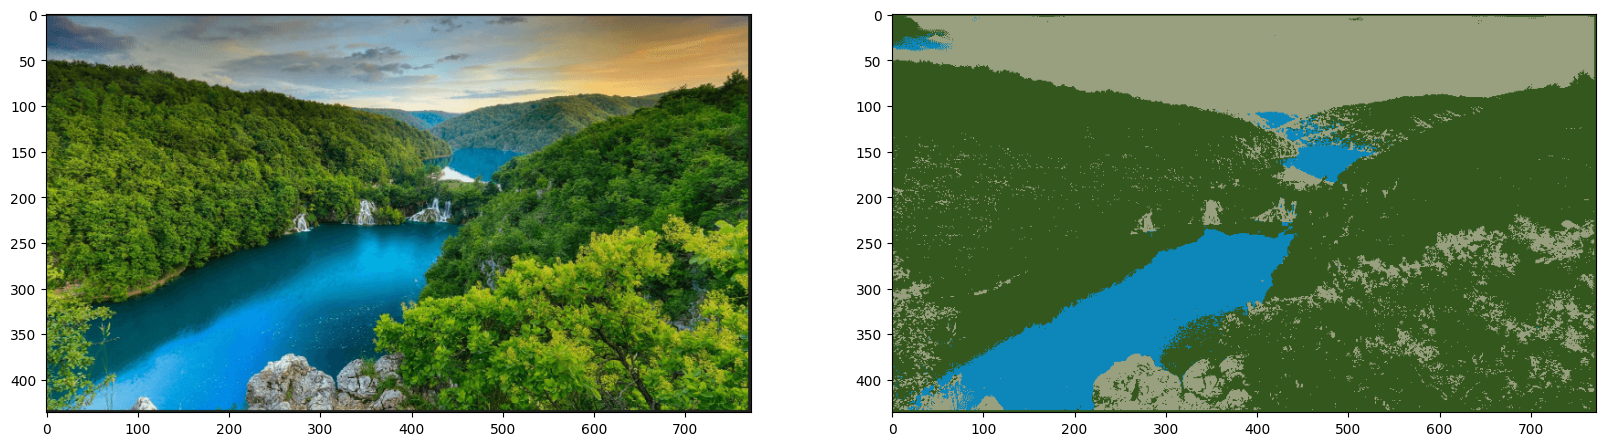

In [7]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/Images/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''

#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan  putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<Axes: >, <matplotlib.image.AxesImage at 0x7d3566f1bc70>)

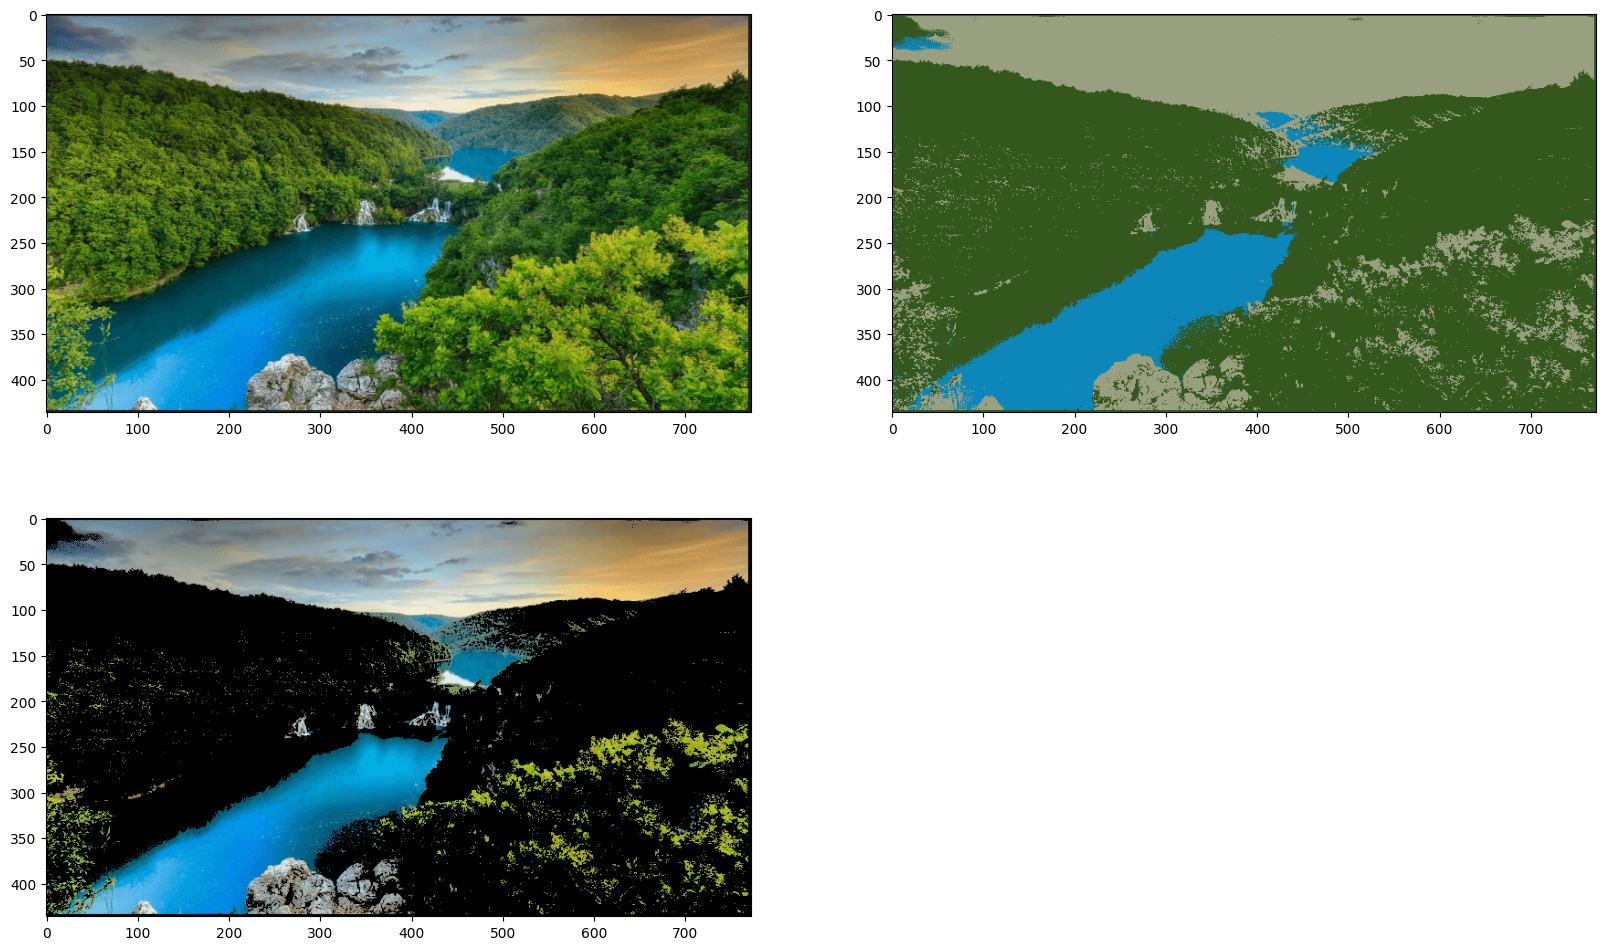

In [8]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

# **TUGAS**

In [22]:
pip install pytesseract

In [65]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
import os

from PIL import Image
from sklearn.cluster import KMeans

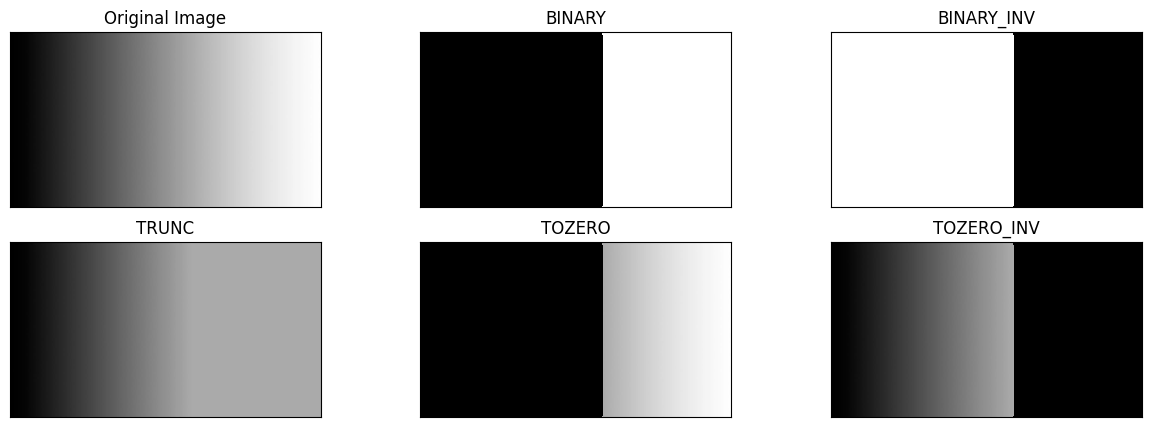

In [9]:
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [14]:
# Fungsi Global Thresholding
def global_thresholding(image, threshold):
    binary = np.zeros_like(image)
    binary[image > threshold] = 255
    return binary

# Fungsi Otsu's Thresholding
def otsu_thresholding(image):
    # Normalisasi histogram
    hist = np.histogram(image, bins=256, range=(0, 256))[0].astype(float)
    hist /= hist.sum()

    maximum = 0
    threshold = 0
    sum_b = 0
    sum_f = np.dot(np.arange(256), hist)
    for t in range(256):
        w_b = np.sum(hist[:t])
        w_f = 1 - w_b
        if w_b == 0 or w_f == 0:
            continue
        sum_b += t * hist[t]
        m_b = sum_b / w_b
        m_f = (sum_f - sum_b) / w_f
        between_class_variance = w_b * w_f * (m_b - m_f) ** 2
        if between_class_variance > maximum:
            maximum = between_class_variance
            threshold = t

    return threshold

Nilai threshold dari Otsu's Thresholding: 145


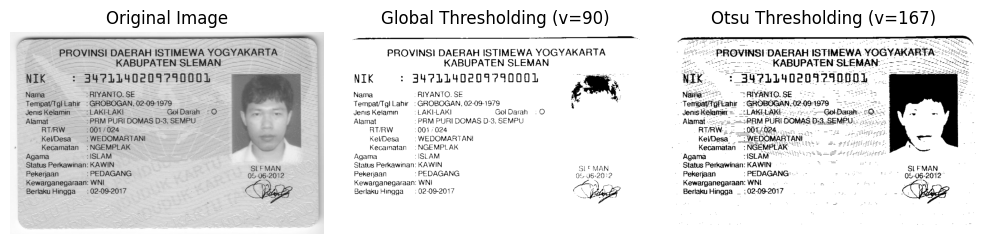

In [15]:
# Path file gambar
image_path = '/content/drive/MyDrive/PCVK/Images/ktp10.png'

# Baca gambar dari path
image = np.array(Image.open(image_path).convert("L"))

# Global Thresholding dengan v=90
global_threshold = global_thresholding(image, 90)

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)

# Tampilkan gambar dan hasil thresholding
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_threshold, cmap='gray')
plt.title('Global Thresholding (v=90)')
plt.axis('off')

plt.subplot(1, 3, 3)
otsu_binary = np.zeros_like(image)
otsu_binary[image > otsu_threshold] = 255
plt.imshow(otsu_binary, cmap='gray')
plt.title('Otsu Thresholding (v=167)')
plt.axis('off')

# Otsu's Thresholding
otsu_threshold = otsu_thresholding(image)
print("Nilai threshold dari Otsu's Thresholding:", otsu_threshold)


plt.tight_layout()
plt.show()

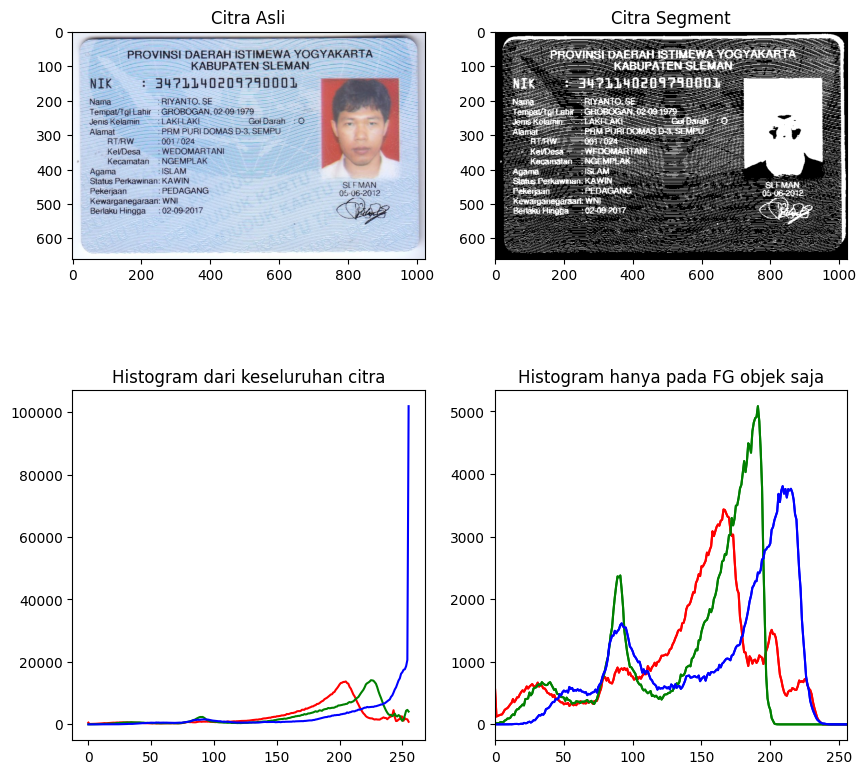

In [20]:
pict_3 = ('/content/drive/MyDrive/PCVK/Images/ktp10.png')
img_l = cv2.imread(pict_3)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

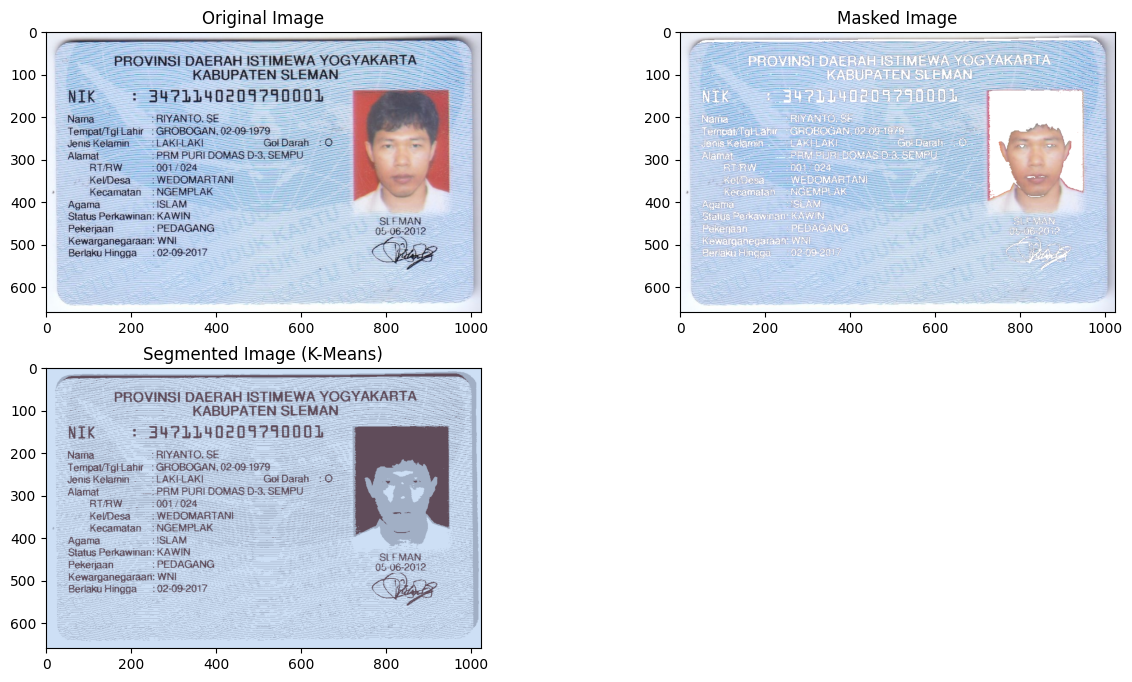

In [31]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

In [47]:
directory = '/content/drive/MyDrive/PCVK/Images/KTP'

# Mengambil File dari variabel directory
image_files = [file for file in os.listdir(directory) if file.endswith((".jpg", ".jpeg", ".png"))]

Global Threshold

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


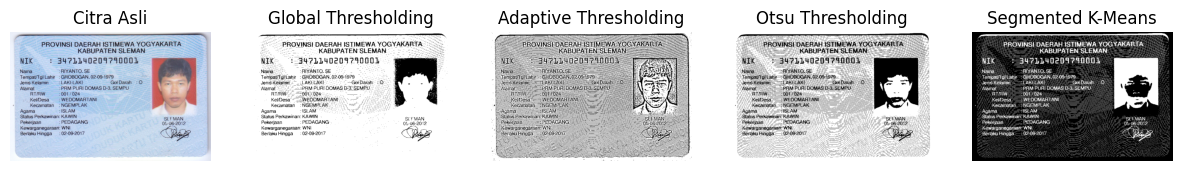

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


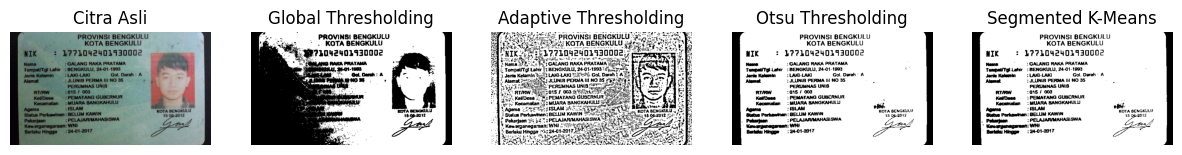

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


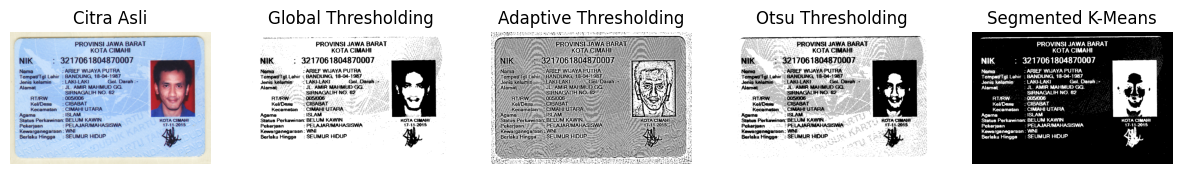

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


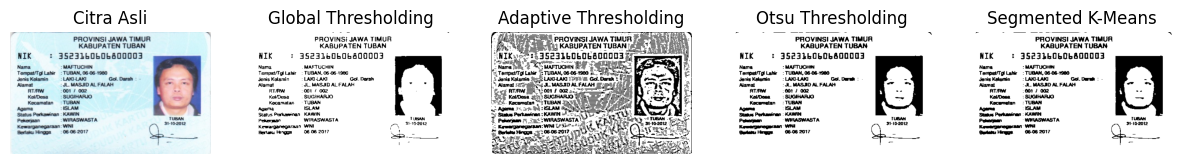

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


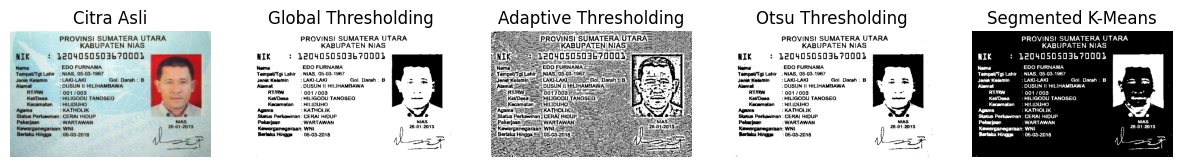

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


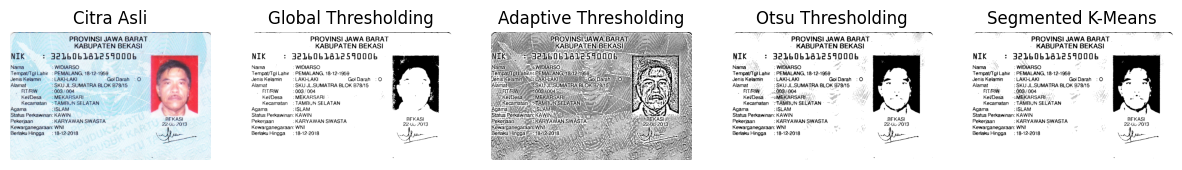

In [66]:
# Ambil File dari direktory
for img_file in image_files:
    img_path = os.path.join(directory, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Global thresholding
    ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Adaptive thresholding
    thresholdedAdaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Otsu's Thresholding
    _, thresholdedOtsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    #K-Means

    # Ubah citra ke format yang dapat dikerjakan oleh K-Means
    img_flat = img.reshape((-1, 3))
    img_flat = np.float32(img_flat)

    # K-Means
    kmeans = KMeans(n_clusters=2, random_state=0)
    labels = kmeans.fit_predict(img_flat)
    segmented = labels.reshape(img.shape[0], img.shape[1])

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 5, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Global Thresholding')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(thresholdedAdaptive, cmap='gray')
    plt.title('Adaptive Thresholding')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(thresholdedOtsu, cmap='gray')
    plt.title('Otsu Thresholding')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(segmented, cmap='gray')
    plt.title('Segmented K-Means')
    plt.axis('off')

    plt.show()